# ROC_AUC in Classification Problem

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.feature_selection import VarianceThreshold

In [3]:
data = pd.read_csv('./Data-Files-for-Feature-Selection-master/santander-train.csv', nrows = 20000)
data.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [4]:
X = data.drop('TARGET', axis = 1)
y = data['TARGET']
X.shape, y.shape

((20000, 370), (20000,))

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

In [6]:
#remove constant and quasi constant features
constant_filter = VarianceThreshold(threshold=0.01)
constant_filter.fit(X_train)
X_train_filter = constant_filter.transform(X_train)
X_test_filter = constant_filter.transform(X_test)
X_train_filter.shape, X_test_filter.shape

((16000, 245), (4000, 245))

In [7]:
#remove duplicate features
X_train_T = X_train_filter.T
X_test_T = X_test_filter.T
X_train_T = pd.DataFrame(X_train_T)
X_test_T = pd.DataFrame(X_test_T)

In [8]:
X_train_T.duplicated().sum()

18

In [9]:
duplicated_features = X_train_T.duplicated()

In [10]:
features_to_keep = [not index for index in duplicated_features]
X_train_unique = X_train_T[features_to_keep].T
X_test_unique = X_test_T[features_to_keep].T
X_train_unique.shape, X_train.shape

((16000, 227), (16000, 370))

## Now calculate ROC_AUC Score

In [11]:
roc_auc = []
for feature in X_train_unique.columns:
    clf = RandomForestClassifier(n_estimators=100, random_state=0)
    clf.fit(X_train_unique[feature].to_frame(), y_train)
    y_pred = clf.predict(X_test_unique[feature].to_frame())
    roc_auc.append(roc_auc_score(y_test, y_pred))

In [12]:
print(roc_auc)

[0.5020561820568537, 0.5, 0.5, 0.49986968986187125, 0.501373452866903, 0.49569976544175137, 0.5028068643863192, 0.49986968986187125, 0.5, 0.5, 0.4997393797237425, 0.5017643832812891, 0.49569976544175137, 0.49960906958561374, 0.49895751889497003, 0.49700286682303885, 0.49960906958561374, 0.5021553136956755, 0.4968725566849101, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.49986968986187125, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5029371745244479, 0.4959603857180089, 0.5, 0.5048318679438659, 0.4997393797237425, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.49921813917122754, 0.49921813917122754, 0.49824600955181303, 0.5, 0.5, 0.5, 0.4990878290330988, 0.4983763196899418, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5

In [13]:
roc_values = pd.Series(roc_auc)
roc_values.index = X_train_unique.columns
roc_values.sort_values(ascending =False, inplace = True)

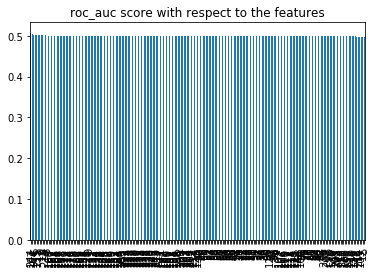

In [14]:
roc_values.plot.bar()
plt.title('roc_auc score with respect to the features')
plt.show()

In [15]:
sel = roc_values[roc_values>0.5]
sel

244    0.507660
107    0.504832
104    0.502937
6      0.502807
155    0.502546
215    0.502286
17     0.502155
0      0.502056
11     0.501764
4      0.501373
216    0.501243
dtype: float64

In [16]:
X_train_roc = X_train_unique[sel.index]
X_test_roc = X_test_unique[sel.index]

### Build the Model and compare the performance

In [17]:
def run_randomForest(X_train, X_test, y_train, y_test):
    clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('Accuracy on test set: ', accuracy_score(y_test, y_pred))

In [18]:
%%time
run_randomForest(X_train_roc, X_test_roc, y_train, y_test)

Accuracy on test set:  0.95275
CPU times: user 3.89 s, sys: 78 ms, total: 3.97 s
Wall time: 1.41 s


In [19]:
X_train_roc.shape

(16000, 11)

In [20]:
%%time
run_randomForest(X_train, X_test, y_train, y_test)

Accuracy on test set:  0.9585
CPU times: user 6.93 s, sys: 164 ms, total: 7.09 s
Wall time: 2.24 s


## Feature Selection using RMSE in Regression

In [21]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [22]:
boston = load_boston()

In [23]:
X = pd.DataFrame(boston.data, columns=boston.feature_names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [24]:
y = boston.target

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [26]:
mse = []
for feature in X_train.columns:
    clf = LinearRegression()
    clf.fit(X_train[feature].to_frame(), y_train)
    y_pred = clf.predict(X_test[feature].to_frame())
    mse.append(mean_squared_error(y_test, y_pred))

In [27]:
mse

[76.38674157646072,
 84.66034377707905,
 77.02905244667242,
 79.36120219345942,
 76.95375968209433,
 46.90735162739531,
 80.3915476111525,
 82.61874125667717,
 82.46499985731933,
 78.30831374720844,
 81.79497121208001,
 77.75285601192718,
 46.336305360025925]

In [28]:
mse = pd.Series(mse, index = X_train.columns)
mse.sort_values(ascending=False, inplace = True)
mse

ZN         84.660344
DIS        82.618741
RAD        82.465000
PTRATIO    81.794971
AGE        80.391548
CHAS       79.361202
TAX        78.308314
B          77.752856
INDUS      77.029052
NOX        76.953760
CRIM       76.386742
RM         46.907352
LSTAT      46.336305
dtype: float64

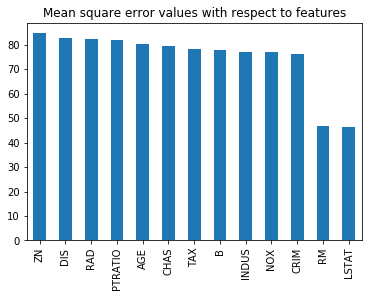

In [29]:
mse.plot.bar()
plt.title('Mean square error values with respect to features')
plt.show()

In [30]:
X_train_2 = X_train[['RM', 'LSTAT']]
X_test_2 = X_test[['RM', 'LSTAT']]

In [31]:
%%time
model = LinearRegression()
model.fit(X_train_2, y_train)
y_pred = model.predict(X_test_2)
print('r2_score: ', r2_score(y_test, y_pred))
print('rmse: ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('sd of house price: ', np.std(y))

r2_score:  0.5409084827186418
rmse:  6.114172522817781
sd of house price:  9.188011545278203
CPU times: user 8.27 ms, sys: 1.3 ms, total: 9.57 ms
Wall time: 10.2 ms


In [32]:
%%time
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('r2_score: ', r2_score(y_test, y_pred))
print('rmse: ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('sd of house price: ', np.std(y))

r2_score:  0.5892223849182512
rmse:  5.783509315085133
sd of house price:  9.188011545278203
CPU times: user 8.82 ms, sys: 1.22 ms, total: 10 ms
Wall time: 9.22 ms
